### Score: 96

Q1.[4+10+10]

Q2.[9]

Q3.[4+5+5+5+5+5+5+4+5+5]

Q4.[5+5+5]

In [3]:
# Question 1
# import pandas 
import pandas as pd
# Read a csv file
Sig_Eqs = pd.read_csv(r"C:\Users\14572\Desktop\ESE_5023\earthquakes-2024-10-23_13-55-19_+0800.tsv", sep='\t')

# Group and total number of deaths by country
Groupby_Country = Sig_Eqs.groupby('Country')
# NOTE: 这里应该读取Total Deaths -1
Country_deaths = Groupby_Country['Deaths'].sum().reset_index()

# Sort and get the top 20 countries
Top_20_countries = Country_deaths.sort_values(by='Deaths', ascending=False).head(20)
print(Top_20_countries)

          Country     Deaths
28          CHINA  2075947.0
141        TURKEY  1188881.0
65           IRAN  1011453.0
69          ITALY   498418.0
132         SYRIA   439224.0
58          HAITI   323478.0
10     AZERBAIJAN   317219.0
71          JAPAN   279607.0
6         ARMENIA   191890.0
103      PAKISTAN   145083.0
66           IRAQ   136200.0
40        ECUADOR   135496.0
142  TURKMENISTAN   117412.0
107          PERU   102169.0
68         ISRAEL    90388.0
110      PORTUGAL    83572.0
53         GREECE    80378.0
27          CHILE    64277.0
62          INDIA    63507.0
133        TAIWAN    57153.0


       Year  Count
0   -2000.0      1
1    -479.0      1
2    -426.0      1
3    -400.0      1
4    -373.0      1
..      ...    ...
492  2012.0     34
493  2013.0     20
494  2015.0      1
495  2017.0      1
496  2019.0      1

[497 rows x 2 columns]


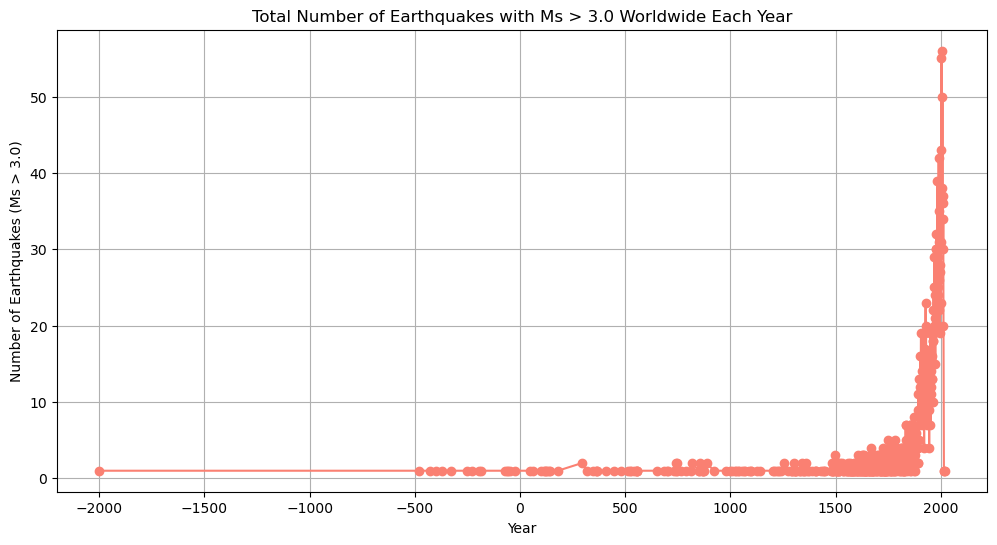

 Observed trends: 
1. There has been a significant increase in the number of earthquakes in recent times (especially in the late 1900's).
2. This increase is mainly due to advances in earthquake monitoring technology, with more earthquakes, especially those of low magnitude, being recorded rather than an actual increase in earthquakes.
3. In early history (e.g., between 2000 BC and 1000 AD), seismic records were scarce, probably due to a lack of monitoring technology and recording systems.
 Thus, this trend reflects more improved monitoring capabilities than real changes in seismic activity.


In [7]:
# Question 2
import matplotlib.pyplot as plt
# Filter out earthquakes with a magnitude greater than 3.0
large_quakes = Sig_Eqs[Sig_Eqs['Ms'] > 3.0]

# Number of earthquakes with a magnitude greater than 3.0 by year
yearly_counts = large_quakes.groupby('Year').size().reset_index(name='Count')

# Display the results
print(yearly_counts)

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts['Year'], yearly_counts['Count'], marker='o', linestyle='-', color='salmon')
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes (Ms > 3.0)')
plt.title('Total Number of Earthquakes with Ms > 3.0 Worldwide Each Year')
plt.grid(True)

# Show the plot
plt.show()

# Trend observation and analysis
print(" Observed trends: ")
print("1. There has been a significant increase in the number of earthquakes in recent times (especially in the late 1900's)." )
print("2. This increase is mainly due to advances in earthquake monitoring technology, with more earthquakes, especially those of low magnitude, being recorded rather than an actual increase in earthquakes." )
print("3. In early history (e.g., between 2000 BC and 1000 AD), seismic records were scarce, probably due to a lack of monitoring technology and recording systems." )
print(" Thus, this trend reflects more improved monitoring capabilities than real changes in seismic activity." )

In [15]:
# Question 3
def CountEq_LargestEq(Country_name):
    # Filter earthquakes by country
    Country_quakes = Sig_Eqs[Sig_Eqs['Country'] == Country_name]
    
    # Total number of earthquakes since 2150 B.C.
    total_quakes = Country_quakes.shape[0]
    
    # Find the largest earthquake in this country
    if total_quakes > 0:
        # Check if there are valid magnitudes to consider
        if Country_quakes['Ms'].notna().any():
            largest_eq = Country_quakes.loc[Country_quakes['Ms'].idxmax()]
            
            # Ensure Mo and Dy are integers and handle any NaNs
            year = largest_eq['Year']
            month = int(largest_eq['Mo']) if pd.notnull(largest_eq['Mo']) else 1  # Default to January
            day = int(largest_eq['Dy']) if pd.notnull(largest_eq['Dy']) else 1  # Default to the 1st
            
            largest_date = f"{year}-{month:02d}-{day:02d}"  # Constructing date string
            largest_location = largest_eq['Location Name']
        else:
            largest_date = None
            largest_location = None
    else:
        largest_date = None
        largest_location = None
    
    return total_quakes, largest_date, largest_location

# Apply the function to all unique countries in the dataset
results = []

for Country in Sig_Eqs['Country'].unique():
    total_quakes, largest_date, largest_location = CountEq_LargestEq(Country)
    results.append((Country, total_quakes, largest_date, largest_location))

# Create a DataFrame for results
results_df = pd.DataFrame(results, columns=['Country', 'Total Earthquakes', 'Largest EQ Date', 'Largest EQ Location'])

# Sort results in descending order of total earthquakes
sorted_results = results_df.sort_values(by='Total Earthquakes', ascending=False)

# Display the results
print(sorted_results)

                      Country  Total Earthquakes Largest EQ Date  \
15                      CHINA                623    1920.0-12-16   
34                      JAPAN                419     869.0-07-13   
71                  INDONESIA                412    2004.0-12-26   
8                        IRAN                386     856.0-12-22   
10                     TURKEY                337    1939.0-12-26   
..                        ...                ...             ...   
120                  KIRIBATI                  1            None   
126                     PALAU                  1    1914.0-10-23   
128  CENTRAL AFRICAN REPUBLIC                  1            None   
135                     LIBYA                  1    1963.0-02-21   
0                         NaN                  0            None   

                               Largest EQ Location  
15         CHINA:  GANSU PROVINCE, SHANXI PROVINCE  
34                                 JAPAN:  SANRIKU  
71     INDONESIA:  SUMAT

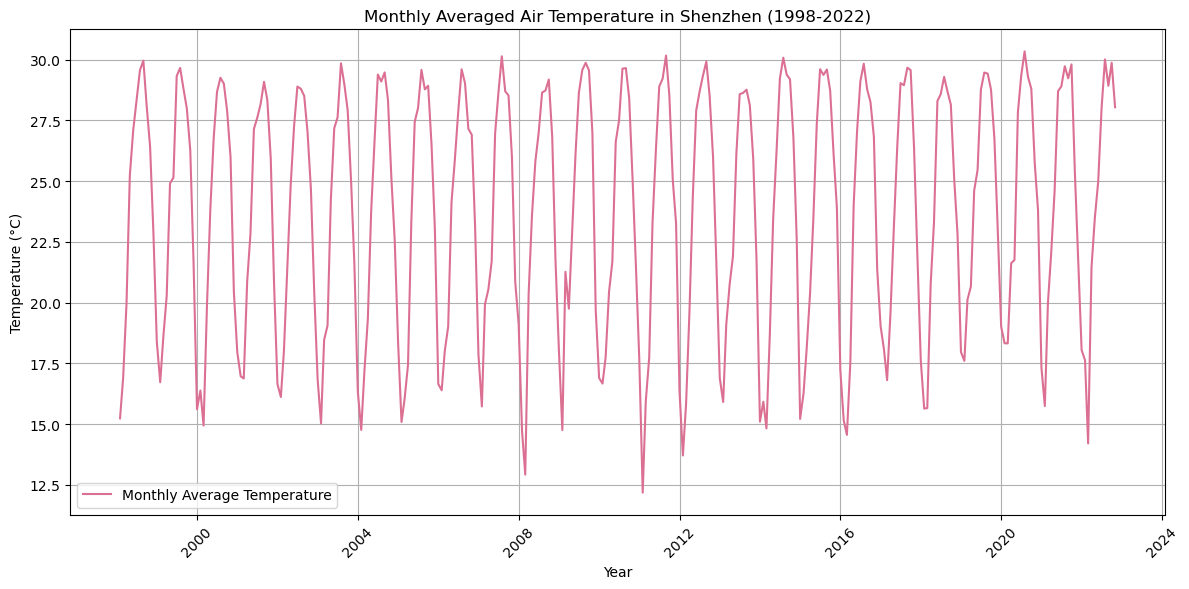

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read a csv file
df = pd.read_csv(r'C:\Users\14572\Desktop\ESE_5023\Baoan_Weather_1998_2022.csv', low_memory=False)

# Extract temperature and quality control columns
temperature_data = df[['DATE', 'TMP', 'QUALITY_CONTROL']]

# Handle missing values (+9999)
temperature_data = temperature_data[temperature_data['TMP'] != '+9999,9']

# Process the TMP column by removing excess characters and converting it to numeric type
# NOTE: 此处没有根据数据质量进行筛选 -1
temperature_data['TMP'] = temperature_data['TMP'].str.extract(r'([+-]?\d+)')[0]  # Extract only the numeric part
temperature_data['TMP'] = pd.to_numeric(temperature_data['TMP'], errors='coerce')

# Filter out NaN values
temperature_data = temperature_data[temperature_data['TMP'].notna()]

# Scale the temperature value in degrees Celsius
temperature_data['TMP'] = temperature_data['TMP'].astype(float) / 10

# Convert date to datetime format
temperature_data['DATE'] = pd.to_datetime(temperature_data['DATE'])

# Set the DATE column as the index
temperature_data.set_index('DATE', inplace=True)

# Temperature by month
monthly_avg_temp = temperature_data['TMP'].resample('ME').mean()  # 使用 'ME' 代替 'M'

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_temp.index, monthly_avg_temp, label='Monthly Average Temperature', color='palevioletred')
plt.title('Monthly Averaged Air Temperature in Shenzhen (1998-2022)')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

In [41]:
# Question 1
import pandas as pd

# Load the dataset with low_memory=False
df = pd.read_csv(r'C:\Users\14572\Desktop\ESE_5023\ibtracs.ALL.list.v04r00.csv',
                 usecols=['SID', 'NAME', 'WMO_WIND'],
                 skiprows=[1], 
                 na_values=['NOT_NAMED', 'NAME'],
                 low_memory=False)

# Converts the 'WMO_WIND' column to a numeric type and removes missing values
df['WMO_WIND'] = pd.to_numeric(df['WMO_WIND'], errors='coerce')
df = df.dropna(subset=['WMO_WIND'])

# Group by Storm Identifier (SID) and aggregate to get the max wind speed and associated name
# NOTE: 注意是需要根据SID分类而不是SID和NAME -1
largest_hurricanes = df.groupby(['SID', 'NAME'])['WMO_WIND'].max().reset_index()

# Sort by wind speed in descending order and get the top 10
top_10_hurricanes = largest_hurricanes.sort_values(by='WMO_WIND', ascending=False).head(10)

# Display the results
print(top_10_hurricanes)

                SID      NAME  WMO_WIND
3633  2015293N13266  PATRICIA     185.0
830   1980214N11330     ALLEN     165.0
1480  1988253N12306   GILBERT     160.0
2842  2005289N18282     WILMA     160.0
2226  1997253N12255     LINDA     160.0
3940  2019236N10314    DORIAN     160.0
3157  2009288N07267      RICK     155.0
3776  2017242N16333      IRMA     155.0
2832  2005261N21290      RITA     155.0
2308  1998295N12284     MITCH     155.0


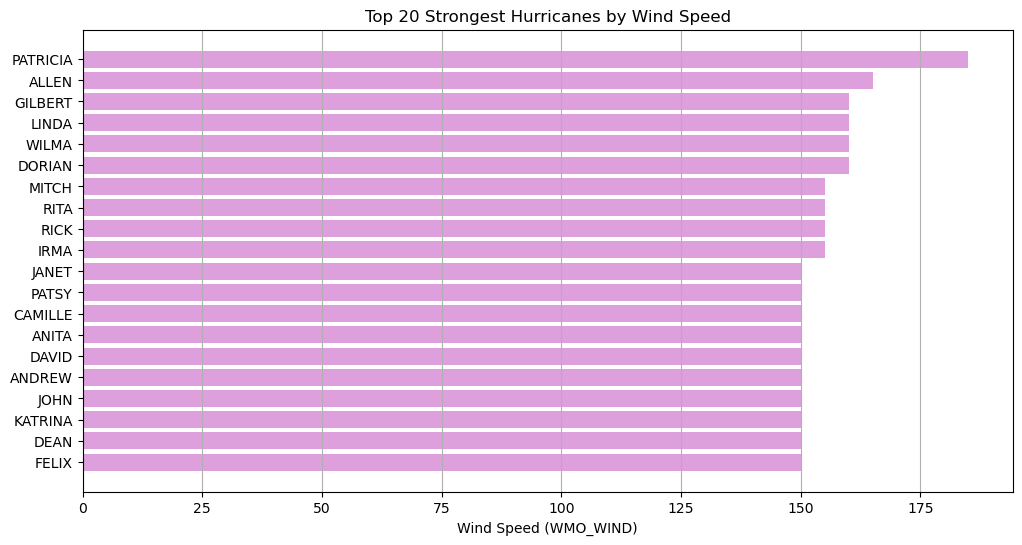

In [42]:
# Question 2
import matplotlib.pyplot as plt

# Get the top 20 hurricanes by wind speed
top_20_hurricanes = largest_hurricanes.nlargest(20, 'WMO_WIND')

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_20_hurricanes['NAME'], top_20_hurricanes['WMO_WIND'], color='plum')
plt.xlabel('Wind Speed (WMO_WIND)')
plt.title('Top 20 Strongest Hurricanes by Wind Speed')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest wind speed at the top
plt.grid(axis='x')

# Show the plot
plt.show()


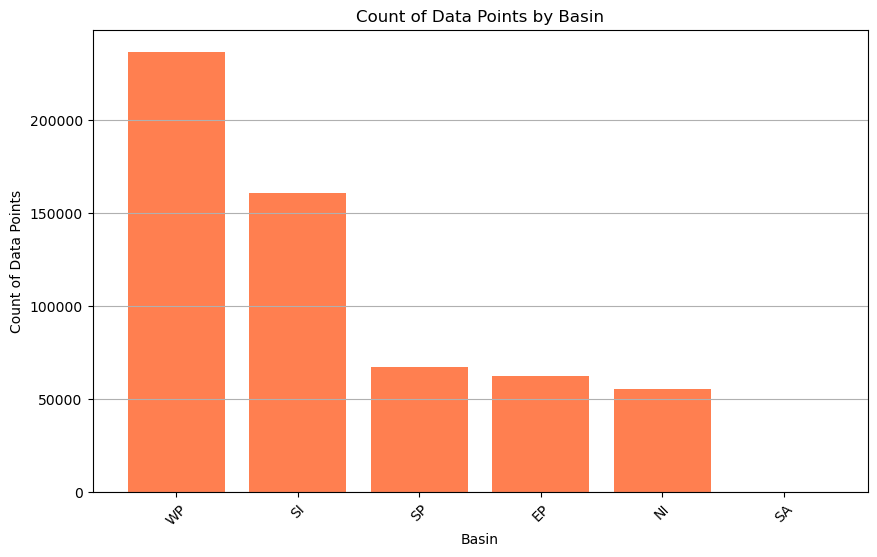

In [45]:
# Question 3
# Load the dataset with low_memory=False
df = pd.read_csv(r'C:\Users\14572\Desktop\ESE_5023\ibtracs.ALL.list.v04r00.csv',
                 usecols=['SID', 'NAME', 'WMO_WIND', 'BASIN'],
                 skiprows=[1], 
                 na_values=['NOT_NAMED', 'NAME'],
                 low_memory=False)

# Count the number of data points by Basin
basin_counts = df['BASIN'].value_counts().reset_index()
basin_counts.columns = ['Basin', 'Count']  # Rename the columns for clarity

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(basin_counts['Basin'], basin_counts['Count'], color='coral')
plt.xlabel('Basin')
plt.ylabel('Count of Data Points')
plt.title('Count of Data Points by Basin')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

# Show the plot
plt.show()

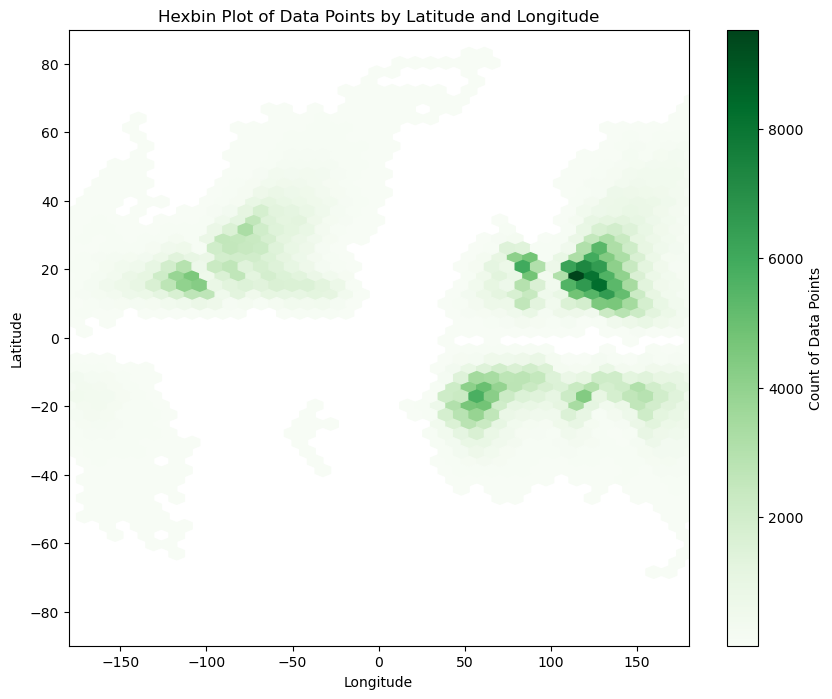

In [46]:
# Question 4
# Load the dataset with low_memory=False
df = pd.read_csv(r'C:\Users\14572\Desktop\ESE_5023\ibtracs.ALL.list.v04r00.csv',
                 usecols=['SID', 'NAME', 'LAT', 'LON'],
                 skiprows=[1], 
                 na_values=['NOT_NAMED', 'NAME'],
                 low_memory=False)

# Ensure the Latitude and Longitude columns are numeric
df['LAT'] = pd.to_numeric(df['LAT'], errors='coerce')
df['LON'] = pd.to_numeric(df['LON'], errors='coerce')

# Create the hexbin plot
plt.figure(figsize=(10, 8))
plt.hexbin(df['LON'], df['LAT'], gridsize=50, cmap='Greens', mincnt=1)
plt.colorbar(label='Count of Data Points')  # Add a colorbar to indicate density
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Hexbin Plot of Data Points by Latitude and Longitude')
plt.xlim(-180, 180)  
plt.ylim(-90, 90)  

# Show the plot
plt.show()

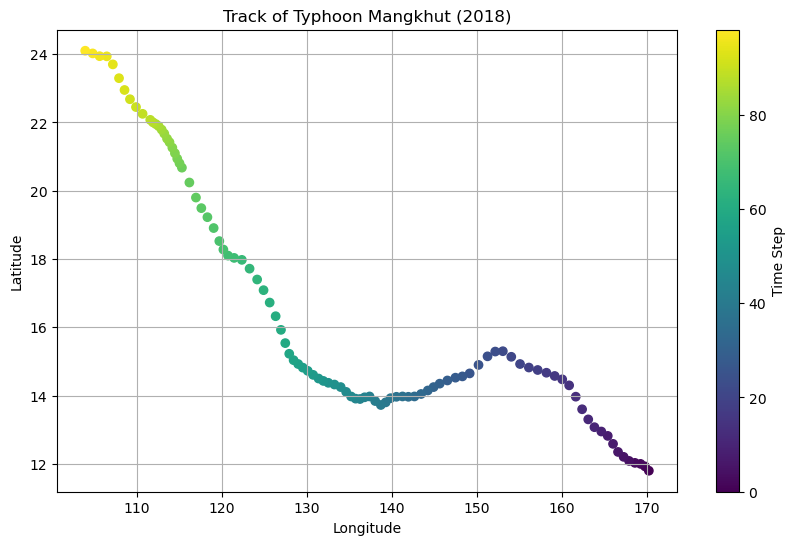

In [47]:
# Question 5
# Load the dataset with low_memory=False
df = pd.read_csv(r'C:\Users\14572\Desktop\ESE_5023\ibtracs.ALL.list.v04r00.csv',
                 usecols=['SID', 'NAME', 'LAT', 'LON', 'SEASON'],
                 skiprows=[1], 
                 na_values=['NOT_NAMED', 'NAME'],
                 low_memory=False)

# Filter for Typhoon Mangkhut from 2018
mangkhut_data = df[(df['NAME'] == 'MANGKHUT') & (df['SEASON'] == 2018)].copy()

# Remove rows with any missing LAT or LON values after conversion
mangkhut_data.dropna(subset=['LAT', 'LON'], inplace=True)

# Plot the track
plt.figure(figsize=(10, 6))
plt.scatter(mangkhut_data['LON'], mangkhut_data['LAT'], c=range(len(mangkhut_data)), cmap='viridis', marker='o')
plt.colorbar(label='Time Step')  #Add color bars to indicate the chronological order
plt.title('Track of Typhoon Mangkhut (2018)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

# Show the plot
plt.show()

In [48]:
# Question 6
# Load the dataset with low_memory=False
filtered_df = pd.read_csv(r'C:\Users\14572\Desktop\ESE_5023\ibtracs.ALL.list.v04r00.csv',
                 usecols=['ISO_TIME', 'SEASON', 'SID', 'NAME', 'BASIN'],
                 parse_dates=['ISO_TIME'],
                 skiprows=[1], 
                 low_memory=False)

# Filter the data for records from 1970 onward and in the WP or EP basins
filtered_df = filtered_df[(filtered_df['SEASON'] >= 1970) & (filtered_df['BASIN'].isin(['WP', 'EP']))].copy()  # Use .copy() to create a separate DataFrame

# Check the first few rows of the filtered data
filtered_df.head()

# Display the results
print(filtered_df.head())

                  SID  SEASON BASIN   NAME            ISO_TIME
350394  1970050N07151    1970    WP  NANCY 1970-02-19 00:00:00
350395  1970050N07151    1970    WP  NANCY 1970-02-19 03:00:00
350396  1970050N07151    1970    WP  NANCY 1970-02-19 06:00:00
350397  1970050N07151    1970    WP  NANCY 1970-02-19 09:00:00
350398  1970050N07151    1970    WP  NANCY 1970-02-19 12:00:00


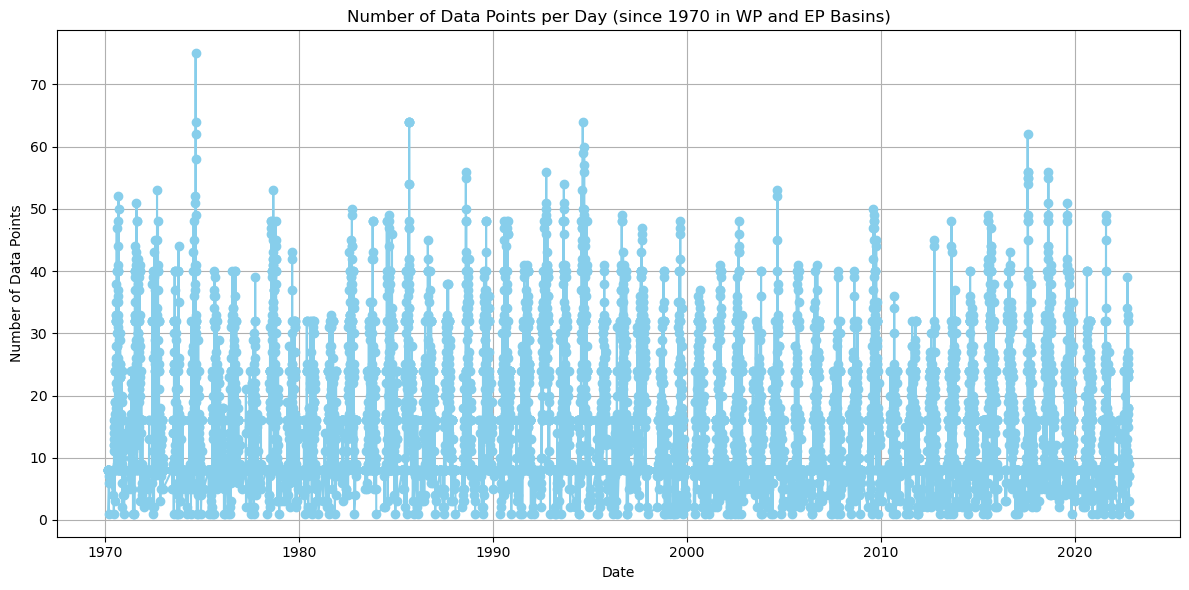

In [50]:
# Question 7
# Convert the 'IS0 TIME'column to date only(removing the time part)
filtered_df['DATE']= filtered_df['ISO_TIME'].dt.date

# Count the number of records per day
daily_counts = filtered_df.groupby('DATE').size()
daily_counts_df = daily_counts.reset_index(name='count')
daily_counts_df['DATE'] = pd.to_datetime(daily_counts_df['DATE'])

# Plot the daily counts
plt.figure(figsize=(12, 6))
plt.plot(daily_counts_df['DATE'], daily_counts_df['count'], marker='o', linestyle='-', color='skyblue')
plt.title('Number of Data Points per Day (since 1970 in WP and EP Basins)')
plt.xlabel('Date')
plt.ylabel('Number of Data Points')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

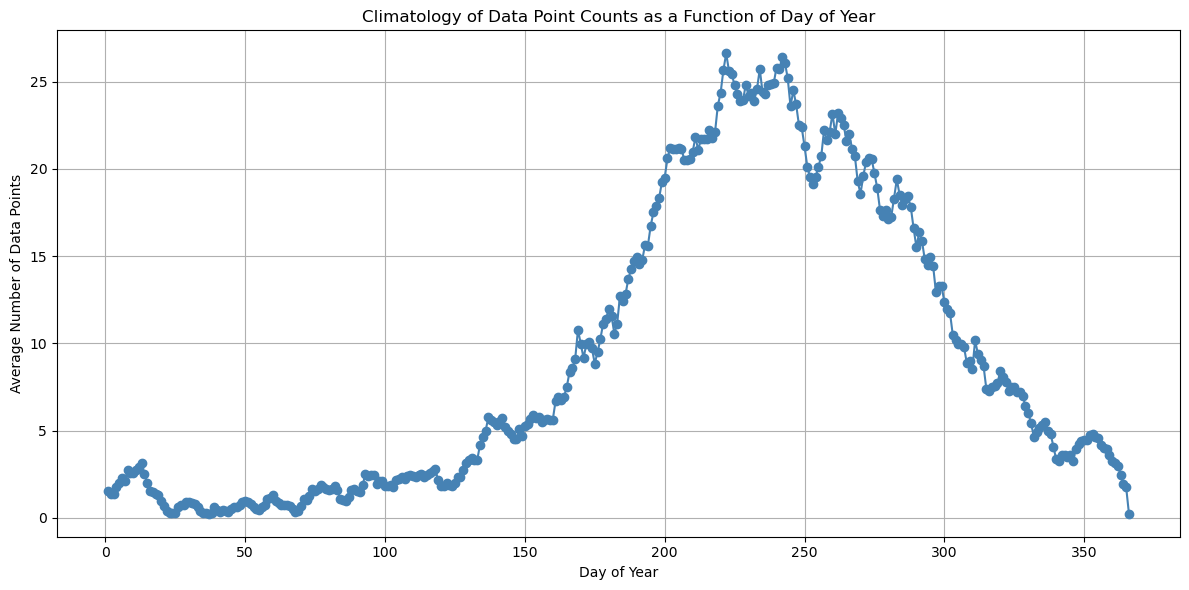

In [51]:
# Question 8
# Ensure 'ISO_TIME' column is in datetime format
filtered_df['ISO_TIME'] = pd.to_datetime(filtered_df['ISO_TIME'], errors='coerce')

# Extract the day of year for each record
filtered_df['DOY'] = filtered_df['ISO_TIME'].dt.dayofyear

# Extract the day of year for each record
filtered_df['DOY'] = filtered_df['ISO_TIME'].dt.dayofyear

# Group by day of year and calculate the mean count per day across all years
# NOTE: 不同DOY不一定出现相同的年数 -1
doy_climatology = filtered_df.groupby('DOY').size() / filtered_df['SEASON'].nunique()
doy_climatology_df = doy_climatology.reset_index(name='average_count')

# Plot the climatology as a scatter plot
plt.figure(figsize=(12, 6))
plt.plot(doy_climatology_df['DOY'], doy_climatology_df['average_count'],  marker='o', linestyle='-',color='steelblue')
plt.title('Climatology of Data Point Counts as a Function of Day of Year')
plt.xlabel('Day of Year')
plt.ylabel('Average Number of Data Points')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

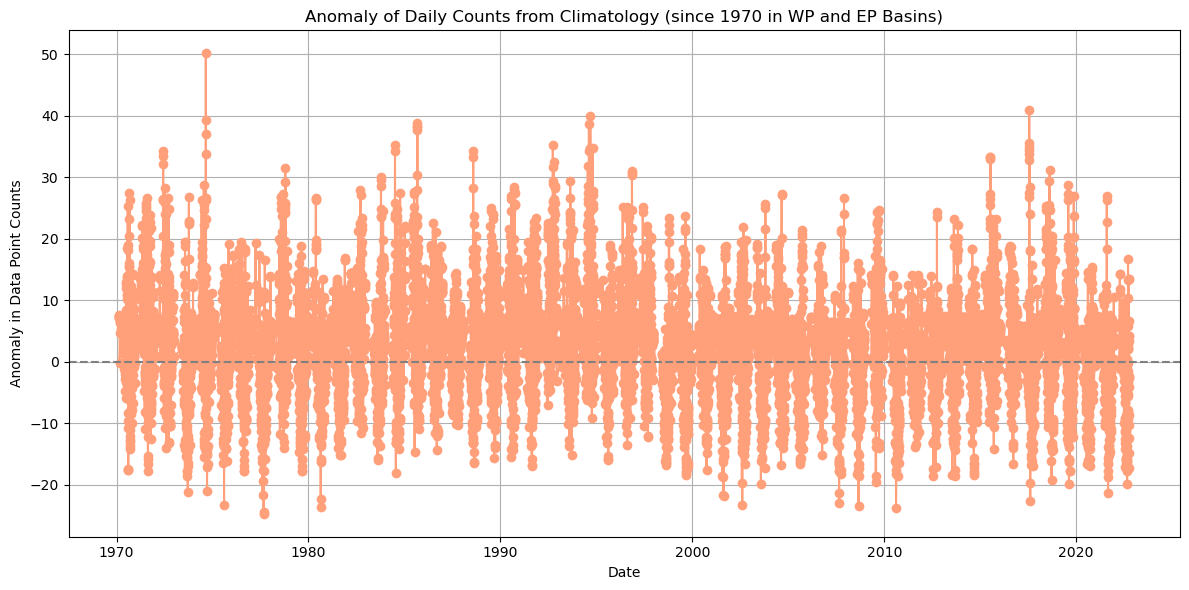

In [57]:
# Question 9
# Convert 'DATE' to datetime format explicitly
daily_counts_df['DATE'] = pd.to_datetime(daily_counts_df['DATE'], errors='coerce')

# Extract the day of year (DOY) from the 'DATE' column
daily_counts_df['DOY'] = daily_counts_df['DATE'].dt.dayofyear

# Merge with climatology data based on 'DOY'
daily_counts_df = daily_counts_df.merge(doy_climatology_df, on='DOY', how='left')

# Calculate the anomaly as the difference between daily counts and climatology
daily_counts_df['anomaly'] = daily_counts_df['count'] - daily_counts_df['average_count']

# Plot the anomalies
plt.figure(figsize=(12, 6))
plt.plot(daily_counts_df['DATE'], daily_counts_df['anomaly'], marker='o', linestyle='-',color='lightsalmon')
plt.title('Anomaly of Daily Counts from Climatology (since 1970 in WP and EP Basins)')
plt.xlabel('Date')
plt.ylabel('Anomaly in Data Point Counts')
plt.axhline(0, color='gray', linestyle='--')  # Add a horizontal line at 0 for reference
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

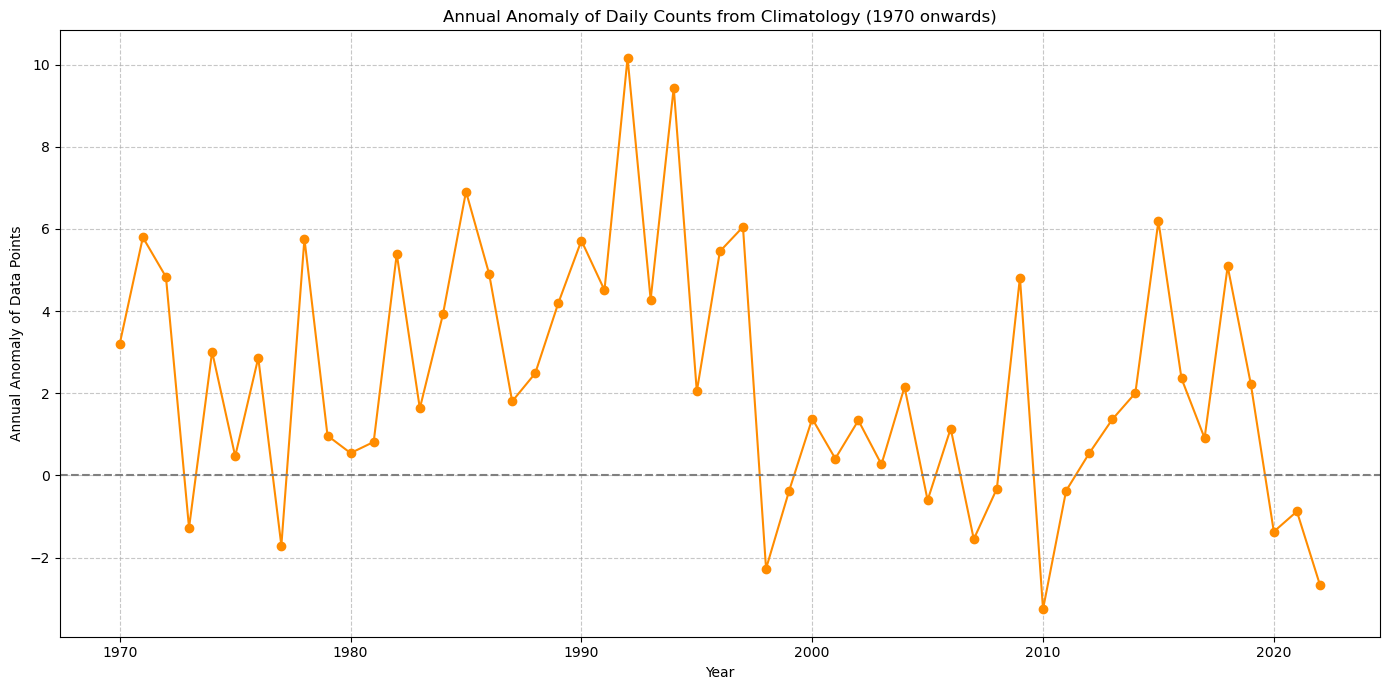

Standout Years with Anomalies:
DATE
1971     5.796501
1978     5.764510
1982     5.390929
1985     6.912163
1990     5.719122
1992    10.166256
1994     9.440193
1996     5.455433
1997     6.050187
2015     6.192821
2018     5.090846
Name: anomaly, dtype: float64


In [65]:
# Question 10
# Resample the anomaly time series at annual resolution by taking the mean of anomalies for each year
annual_anomalies = daily_counts_df.resample('YE', on='DATE')['anomaly'].mean()

# Convert the index to year format for better readability
annual_anomalies.index = annual_anomalies.index.year

# Plot the annual anomalies as a line plot with markers
plt.figure(figsize=(14, 7))
plt.plot(annual_anomalies.index, annual_anomalies.values, marker='o', linestyle='-', color='darkorange', markersize=6)
plt.title('Annual Anomaly of Daily Counts from Climatology (1970 onwards)')
plt.xlabel('Year')
plt.ylabel('Annual Anomaly of Data Points')
plt.axhline(0, color='gray', linestyle='--')  # Reference line at 0
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

# To identify the standout years with anomalous hurricane activity
# Define a threshold to identify standout years (e.g., abs(anomaly) > 5)
threshold = 5
standout_years = annual_anomalies[abs(annual_anomalies) > threshold]

# Display the standout years and their corresponding anomaly values
print("Standout Years with Anomalies:")
print(standout_years)

# Identify years with standout hurricane activity by looking at the plot
# By visually inspecting the plot:
# The years with peaks above the zero line indicate higher-than-average hurricane activity.
# The years with noticeable dips below the zero line indicate lower-than-average activity.
# From the plot, some of the potential standout years with high anomalies appear to be around: Early 1980s, Late 1990s, Early 2010s. 
# Years with significant low anomalies appear to be around: Early 2000s, Around 2020.

In [67]:
# My data is downloaded from the National Centers for Environmental Information (NCEI) and the steps are as follows
# Click Daily Observational data
# Then click Global Summary of the Day
# Select Jingdezhen using the Map tools box
# And then download the daily meteorological data of Jingdezhen

# Question 1
import pandas as pd

# Read a csv file
df = pd.read_csv('3830694.csv')

print(df.columns)

# Drop rows with any missing values
df_cleaned = df.dropna()

# Save the cleaned dataset
df_cleaned.to_csv('cleaned_data.csv', index=False)

# Display the results
print(df_cleaned)
print("\nCleaned data saved as 'cleaned_data.csv'.")

Index(['STATION', 'DATE', 'DEWP', 'FRSHTT', 'GUST', 'MAX', 'MIN', 'MXSPD',
       'PRCP', 'SLP', 'SNDP', 'STP', 'TEMP', 'VISIB', 'WDSP'],
      dtype='object')
           STATION        DATE  DEWP  FRSHTT   GUST   MAX     MIN  MXSPD  \
0      58527099999  1956-08-20  73.8   10000  999.9  79.0  9999.9    9.9   
1      58527099999  1956-08-21  73.7   10000  999.9  84.0    73.0    4.1   
2      58527099999  1956-08-22  73.5       0  999.9  93.0    75.0    8.0   
3      58527099999  1956-08-23  72.8   10010  999.9  77.0    73.0    4.1   
4      58527099999  1956-08-24  73.2   10000  999.9  88.0    73.0    4.1   
...            ...         ...   ...     ...    ...   ...     ...    ...   
21600  58527099999  2024-10-23  46.4       0  999.9  74.1    54.0    5.8   
21601  58527099999  2024-10-24  47.4       0  999.9  77.0    50.5    9.7   
21602  58527099999  2024-10-25  54.0       0  999.9  77.0    54.7    9.7   
21603  58527099999  2024-10-26  63.0       0  999.9  79.2    58.5    7.8   
2160

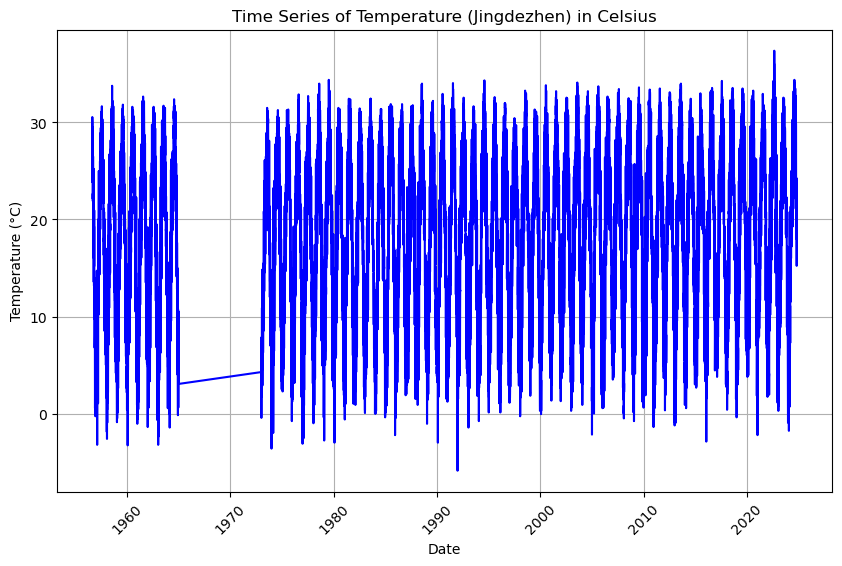

In [69]:
# Question 2
import matplotlib.pyplot as plt

# Read the cleaned CSV file
df_cleaned = pd.read_csv('cleaned_data.csv')

# Convert 'DATE' column to datetime
df_cleaned['DATE'] = pd.to_datetime(df_cleaned['DATE'], errors='coerce')

# Convert TEMP from Fahrenheit to Celsius
df_cleaned['Temperature (C)'] = (df_cleaned['TEMP'] - 32) * 5 / 9

# Plot the time series
plt.figure(figsize=(10, 6)) 
plt.plot(df_cleaned['DATE'], df_cleaned['Temperature (C)'], label='Temperature (°C)', color='blue')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Time Series of Temperature (Jingdezhen) in Celsius')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)

# Show the plot
plt.show()

In [71]:
# Question 3
# Calculate basic statistics for temperature
mean_temp = df_cleaned['Temperature (C)'].mean()             # Mean
median_temp = df_cleaned['Temperature (C)'].median()         # Median
std_temp = df_cleaned['Temperature (C)'].std()               # Standard deviation
min_temp = df_cleaned['Temperature (C)'].min()               # Minimum
max_temp = df_cleaned['Temperature (C)'].max()               # Maximum
quantiles_temp = df_cleaned['Temperature (C)'].quantile([0.25, 0.5, 0.75])  # Quartiles

# Print results
print("Temperature (C) Statistical Summary:")
print(f"Mean Temperature: {mean_temp:.2f} °C")
print(f"Median Temperature: {median_temp:.2f} °C")
print(f"Standard Deviation: {std_temp:.2f}")
print(f"Minimum Temperature: {min_temp:.2f} °C")
print(f"Maximum Temperature: {max_temp:.2f} °C")
print(f"25th Percentile: {quantiles_temp[0.25]:.2f} °C")
print(f"50th Percentile (Median): {quantiles_temp[0.5]:.2f} °C")
print(f"75th Percentile: {quantiles_temp[0.75]:.2f} °C")

# Report my findings
# Mean Temperature: 18.06°C — This average temperature suggests that Jingdezhen generally experiences mild weather over the time period analyzed.
# Median Temperature: 19.00°C — The median being slightly higher than the mean indicates a slight skew toward warmer temperatures in the data distribution.
# Standard Deviation: 8.84°C — This relatively high value points to notable temperature variability, likely due to seasonal changes.
# Minimum Temperature: -5.89°C — This is the lowest recorded temperature, indicating occasional cold weather extremes.
# Maximum Temperature: 37.39°C — This is the highest recorded temperature, showing that Jingdezhen can experience very warm days, likely in the summer.
# 25th Percentile (10.33°C) and 75th Percentile (25.67°C) — These values show that the middle 50% of temperatures range between 10.33°C and 25.67°C, highlighting a significant spread. This further supports the seasonal variability observed in the region.
# In summary, Jingdezhen’s climate appears to range widely from below-freezing temperatures in the coldest months to above 37°C in the hottest months. The high variability and median above the mean suggest both a seasonal pattern and a slight warm temperature bias in the dataset.

Temperature (C) Statistical Summary:
Mean Temperature: 18.06 °C
Median Temperature: 19.00 °C
Standard Deviation: 8.84
Minimum Temperature: -5.89 °C
Maximum Temperature: 37.39 °C
25th Percentile: 10.33 °C
50th Percentile (Median): 19.00 °C
75th Percentile: 25.67 °C
